In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_fscore_support

In [2]:
#load the pixel data
poppy_pos = np.load('/home/esther/poppy-finder/data/poppy_pos.npy')
poppy_neg = np.load('/home/esther/poppy-finder/data/poppy_neg.npy')

#load the boolean arrays
antelope_pos_bool = np.load('/home/esther/poppy-finder/data/antelope_pos_bool.npy')
antelope_neg_bool = np.load('/home/esther/poppy-finder/data/antelope_neg_bool.npy')
elsinore_pos_bool = np.load('/home/esther/poppy-finder/data/elsinore_pos_bool.npy')
elsinore_neg_bool = np.load('/home/esther/poppy-finder/data/elsinore_neg_bool.npy')
grassmtn_pos_bool = np.load('/home/esther/poppy-finder/data/grassmtn_pos_bool.npy')
grassmtn_neg_bool = np.load('/home/esther/poppy-finder/data/grassmtn_neg_bool.npy')

#load files (for visual checks of predictions)
antelope_pos = np.load('/home/esther/shared/2019-03-30_antelope.npy')
antelope_neg = np.load('/home/esther/shared/2019-03-10_antelope.npy')
elsinore_pos = np.load('/home/esther/shared/2019-03-25_elsinore.npy')
elsinore_neg = np.load('/home/esther/shared/2019-04-24_elsinore.npy')
grassmtn_pos = np.load('/home/esther/shared/2019-03-18_grassmtn.npy')
grassmtn_neg = np.load('/home/esther/shared/2019-04-27_grassmtn.npy')

In [3]:
#predicts label of all pixels in an image

def predict_pixels(img, scaler):
    
    #copy image array and reshape so channels are columns and pixels are rows
    img_copy = np.copy(img)
    img_copy = np.reshape(img_copy, (-1,13))
    
    #scale
    img_copy = scaler.transform(img_copy)
    
    #predict all the pixels
    y_img_pred_lr = clf_lr.predict(img_copy)
    y_img_pred_rf = clf_rf.predict(img_copy)
    y_img_pred_nb = clf_nb.predict(img_copy)
    y_img_pred_sgd = clf_sgd.predict(img_copy)
    y_img_pred_gb = clf_gb.predict(img_copy)
    
    #reshape for visualization
    y_img_pred_lr = np.reshape(y_img_pred_lr, img[:,:,0].shape)
    y_img_pred_rf = np.reshape(y_img_pred_rf, img[:,:,0].shape)
    y_img_pred_nb = np.reshape(y_img_pred_nb, img[:,:,0].shape)
    y_img_pred_sgd = np.reshape(y_img_pred_sgd, img[:,:,0].shape)
    y_img_pred_gb = np.reshape(y_img_pred_gb, img[:,:,0].shape)
    
    return (y_img_pred_lr, y_img_pred_rf, y_img_pred_nb, y_img_pred_sgd, y_img_pred_gb)

In [4]:
#plots visual check of predictions

def visual_check(y_img_preds, img):
    
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    
    axs[0,0].imshow(y_img_preds[0])
    axs[0,1].imshow(y_img_preds[1])
    axs[0,2].imshow(y_img_preds[2])
    axs[1,0].imshow(y_img_preds[3])
    axs[1,1].imshow(y_img_preds[4])
    axs[1,2].imshow(np.minimum(img[:, :, [3,2,1]] * 5, 1))
    
    axs[0,0].title.set_text('lr')
    axs[0,1].title.set_text('rf')
    axs[0,2].title.set_text('nb')
    axs[1,0].title.set_text('sgd')
    axs[1,1].title.set_text('gb')
    
    axs[0,0].grid()
    axs[0,1].grid()
    axs[0,2].grid()
    axs[1,0].grid()
    axs[1,1].grid()
    axs[1,2].grid()

In [ ]:
#gets prediction probabilities

def predict_probas(img, scaler):
    
    #copy image array and reshape so channels are columns and pixels are rows
    img_copy = np.copy(img)
    img_copy = np.reshape(img_copy, (-1,13))
    
    #scale
    img_copy = scaler.transform(img_copy)
    
    #get prediction probability for all the pixels
    y_img_pred_lr = clf_lr.predict_proba(img_copy)
    y_img_pred_rf = clf_rf.predict_proba(img_copy)
    y_img_pred_nb = clf_nb.predict_proba(img_copy)
    y_img_pred_sgd = clf_sgd.decision_function(img_copy) #confidence score - above zero = class 1, below zero = class2
    y_img_pred_gb = clf_gb.predict_proba(img_copy)
    
    #reshape prediction that its a poppy - for visualization
    y_img_pred_lr = np.reshape(y_img_pred_lr[:,1], img[:,:,0].shape)
    y_img_pred_rf = np.reshape(y_img_pred_rf[:,1], img[:,:,0].shape)
    y_img_pred_nb = np.reshape(y_img_pred_nb[:,1], img[:,:,0].shape)
    y_img_pred_sgd = np.reshape(y_img_pred_sgd, img[:,:,0].shape)
    y_img_pred_gb = np.reshape(y_img_pred_gb[:,1], img[:,:,0].shape)
    
    return (y_img_pred_lr, y_img_pred_rf, y_img_pred_nb, y_img_pred_sgd, y_img_pred_gb)

In [ ]:
#plots visual check of prediction probabilities

def visual_check_proba(y_img_pred_probas, img):
    
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    
    ax1 = axs[0,0].imshow(y_img_pred_probas[0])
    ax2 = axs[0,1].imshow(y_img_pred_probas[1])
    ax3 = axs[0,2].imshow(y_img_pred_probas[2])
    ax4 = axs[1,0].imshow(y_img_pred_probas[3])
    ax5 = axs[1,1].imshow(y_img_pred_probas[4])
    ax6 = axs[1,2].imshow(np.minimum(img[:, :, [3,2,1]] * 5, 1))
    
    axs[0,0].title.set_text('lr')
    axs[0,1].title.set_text('rf')
    axs[0,2].title.set_text('nb')
    axs[1,0].title.set_text('sgd')
    axs[1,1].title.set_text('gb')
    
    axs[0,0].grid()
    axs[0,1].grid()
    axs[0,2].grid()
    axs[1,0].grid()
    axs[1,1].grid()
    axs[1,2].grid()
    
    fig.colorbar(ax1, ax=axs[0,0])
    fig.colorbar(ax2, ax=axs[0,1])
    fig.colorbar(ax3, ax=axs[0,2])
    fig.colorbar(ax4, ax=axs[1,0])
    fig.colorbar(ax5, ax=axs[1,1])
    fig.colorbar(ax6, ax=axs[1,2])

In [5]:
#get features and labels
X = np.vstack((poppy_pos, poppy_neg))
y = np.concatenate( ( np.ones(poppy_pos.shape[0]), np.zeros(poppy_neg.shape[0]) ) )

In [6]:
#test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
#fit scaler to training data and scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#apply same transformation to test data
X_test = scaler.transform(X_test)

In [8]:
#initialize models
clf_lr = LogisticRegression(max_iter=100, random_state=1)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=1)
clf_nb = GaussianNB()
clf_sgd = SGDClassifier(loss='hinge', penalty='l2', random_state=1)
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=1)

# #add models to voter
# eclf = VotingClassifier(estimators=[('lr', clf_lr), ('rf', clf_rf), ('gnb', clf_nb), ('sgd', clf_sgd), ('gb', clf_gb)],
#                         voting='hard',
#                         weights=[1, 1, 1, 1, 1])

# #note: to train and test labeled data use voting='hard' (majority vote)

In [9]:
#fit models to training data
clf_lr = clf_lr.fit(X_train, y_train);
clf_rf = clf_rf.fit(X_train, y_train);
clf_nb = clf_nb.fit(X_train, y_train);
clf_sgd = clf_sgd.fit(X_train, y_train);
clf_gb = clf_gb.fit(X_train, y_train);

In [10]:
#look at mean precision score for each model
score_lr = clf_lr.score(X_test, y_test)
score_rf = clf_rf.score(X_test, y_test)
score_nb = clf_nb.score(X_test, y_test)
score_sgd = clf_sgd.score(X_test, y_test)
score_gb = clf_gb.score(X_test, y_test)

print('lr ', score_lr, '\nrf ', score_rf, '\nnb ', score_nb, '\nsgd ', score_sgd, '\ngb ', score_gb)

lr  0.9943344974776872 
rf  0.9991462941404734 
nb  0.9099728366317423 
sgd  0.9953434225844005 
gb  0.9984478075281334


### Note
The scores are very close to perfect because I chose pixels for the training set that are very clearly different from each other. These high scores basically confirm my bias in choosing pixels, and are expected at this early stage. As the model gets exposed to different types of pixels the scores should go down. This seems paradoxical, but it basically means that the model is getting better and more flexible at recognizing different types of pixels. In other words, as the model gets better it will lose the bias that I've introduced by hand picking very obviously separable pixels. As a result, it will sometimes make more mistakes, but the trade-off will be that it will correctly classsify a much larger range of pixels than what it was initially introduced to. 

In [11]:
#predict test data
y_pred_lr = clf_lr.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)
y_pred_nb = clf_nb.predict(X_test)
y_pred_sgd = clf_sgd.predict(X_test)
y_pred_gb = clf_gb.predict(X_test)

In [12]:
#precision, recall and f-scores for each model, each class

prf_lr = precision_recall_fscore_support(y_test, y_pred_lr, average=None)
prf_rf = precision_recall_fscore_support(y_test, y_pred_rf, average=None)
prf_nb = precision_recall_fscore_support(y_test, y_pred_nb, average=None)
prf_sgd = precision_recall_fscore_support(y_test, y_pred_sgd, average=None)
prf_gb = precision_recall_fscore_support(y_test, y_pred_gb, average=None)

print(prf_lr, '\n', prf_rf, '\n', prf_nb, '\n', prf_sgd, '\n', prf_gb)

(array([0.9934688 , 0.99691263]), array([0.99895757, 0.9808627 ]), array([0.99620562, 0.98882254]), array([9593, 3292])) 
 (array([0.9990625 , 0.99939117]), array([0.99979151, 0.9972661 ]), array([0.99942687, 0.9983275 ]), array([9593, 3292])) 
 (array([0.98493387, 0.75441527]), array([0.89273429, 0.96020656]), array([0.93657043, 0.84496124]), array([9593, 3292])) 
 (array([0.9947068 , 0.99723077]), array([0.99906182, 0.9845079 ]), array([0.99687955, 0.99082849]), array([9593, 3292])) 
 (array([0.9983342 , 0.99878049]), array([0.99958303, 0.99513973]), array([0.99895822, 0.99695679]), array([9593, 3292]))


# Inspect Antelope Valley predictions and prediction probabilities

In [13]:
#get predictions
y_antelope_pos_preds = predict_pixels(antelope_pos, scaler)
y_antelope_neg_preds = predict_pixels(antelope_neg, scaler)

#get prediction probabilities
y_antelope_pos_pred_probas = predict_probas(antelope_pos, scaler)
y_antelope_neg_pred_probas = predict_probas(antelope_neg, scaler)

### positive poppy image

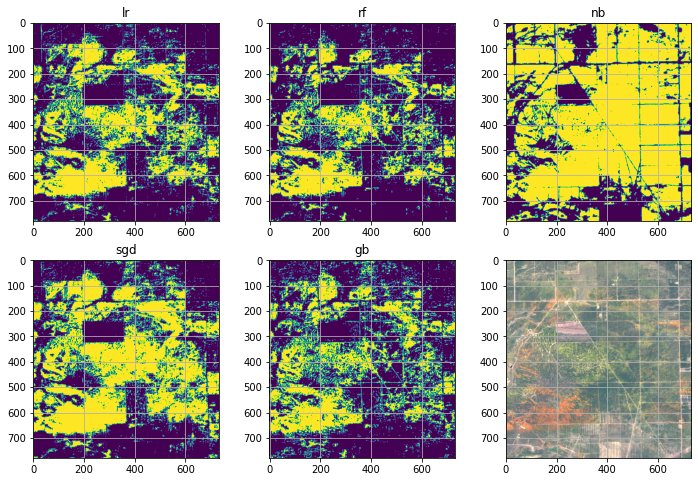

In [14]:
visual_check(y_antelope_pos_preds, antelope_pos)

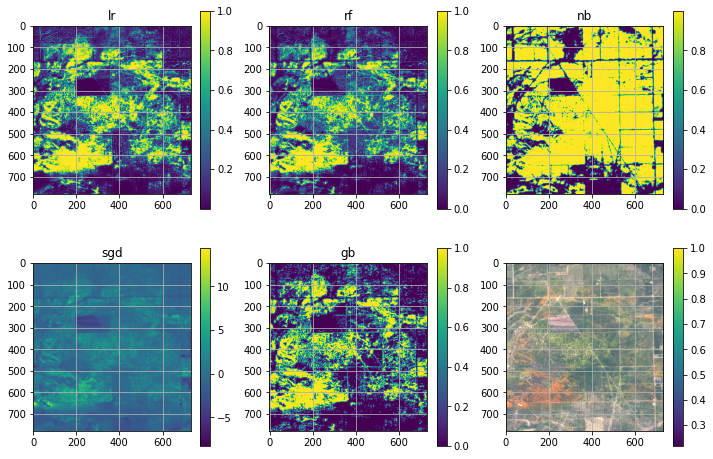

In [95]:
visual_check_proba(y_antelope_pos_pred_probas, antelope_pos)

### negative poppy image

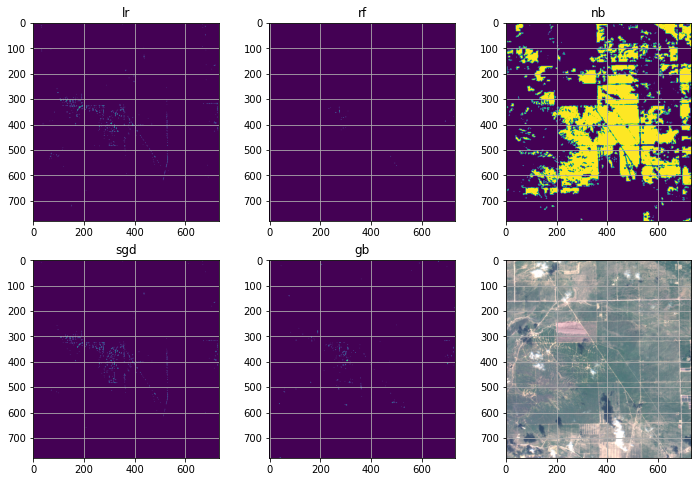

In [15]:
visual_check(y_antelope_neg_preds, antelope_neg)

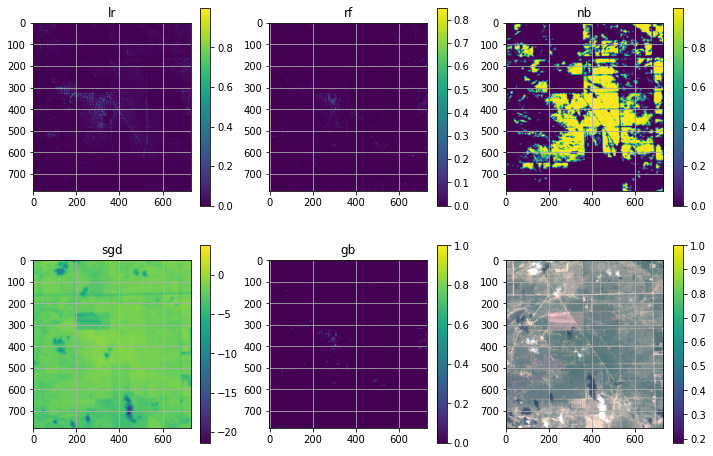

In [96]:
visual_check_proba(y_antelope_neg_pred_probas, antelope_neg)

# Inspect Lake Elsinore predictions

In [97]:
#get predictions
y_elsinore_pos_preds = predict_pixels(elsinore_pos, scaler)
y_elsinore_neg_preds = predict_pixels(elsinore_neg, scaler)

#get predict probabilities
y_elsinore_pos_pred_probas = predict_probas(elsinore_pos, scaler)
y_elsinore_neg_pred_probas = predict_probas(elsinore_neg, scaler)

### positive poppy image

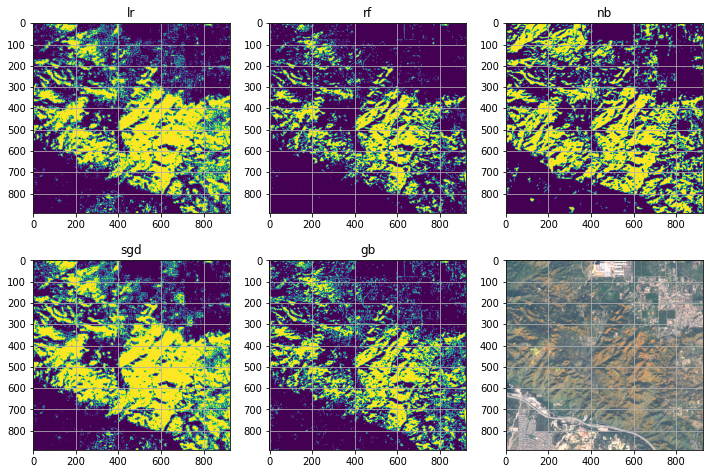

In [17]:
visual_check(y_elsinore_pos_preds, elsinore_pos)

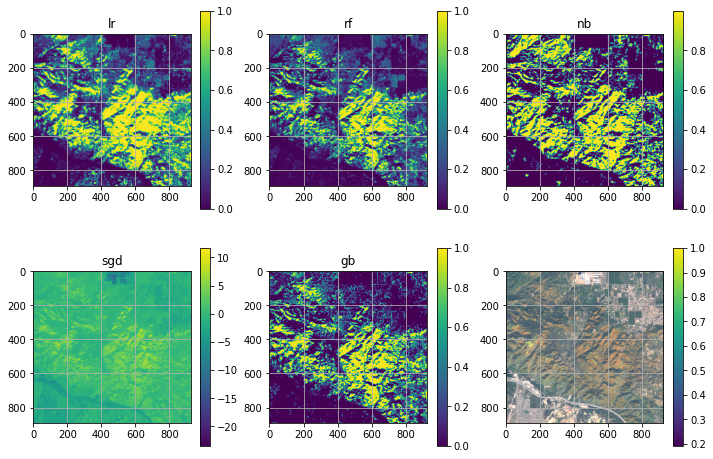

In [98]:
visual_check_proba(y_elsinore_pos_pred_probas, elsinore_pos)

### negative poppy image

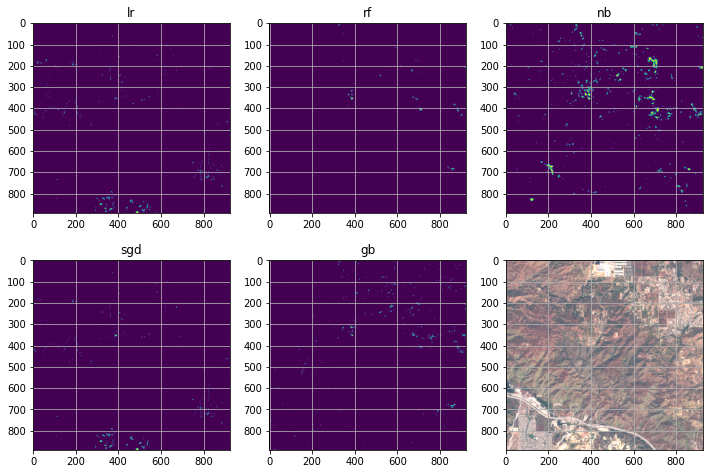

In [18]:
visual_check(y_elsinore_neg_preds, elsinore_neg)

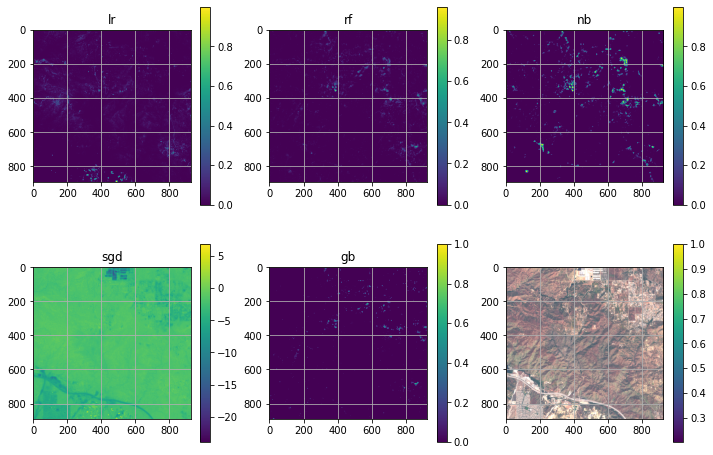

In [99]:
visual_check_proba(y_elsinore_neg_pred_probas, elsinore_neg)

# Grass Mountain Predictions

In [100]:
#get predictions
y_grassmtn_pos_preds = predict_pixels(grassmtn_pos, scaler)
y_grassmtn_neg_preds = predict_pixels(grassmtn_neg, scaler)

#get prediction probabilities
y_grassmtn_pos_pred_probas = predict_proba(grassmtn_pos, scaler)
y_grassmtn_neg_pred_probas = predict_proba(grassmtn_neg, scaler)

### positive poppy image

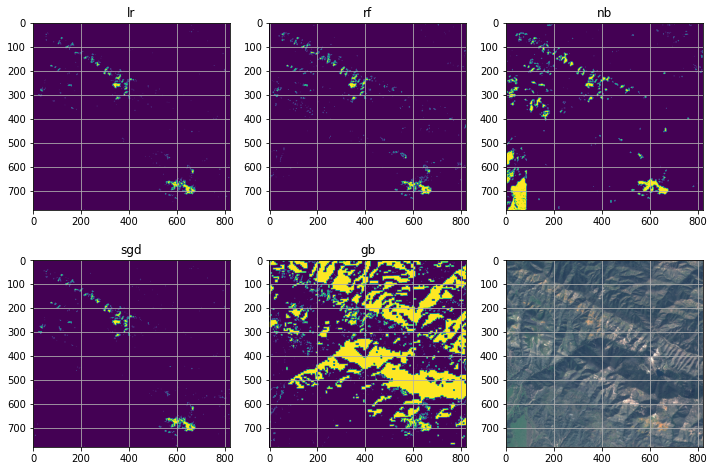

In [20]:
visual_check(y_grassmtn_pos_preds, grassmtn_pos)

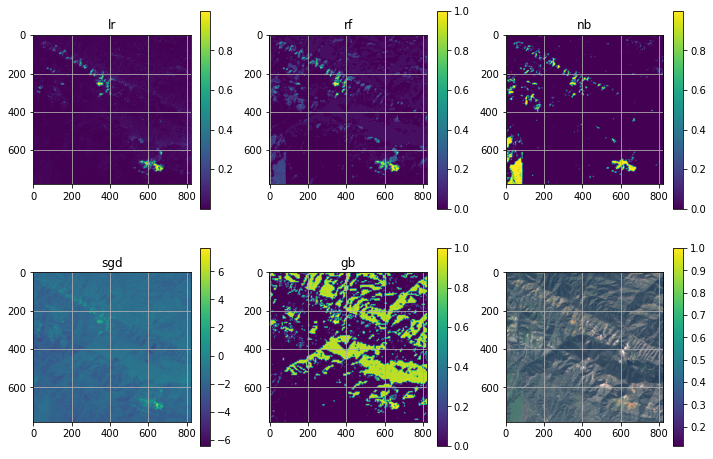

In [102]:
visual_check_proba(y_grassmtn_pos_pred_probas, grassmtn_pos)

### negative poppy image

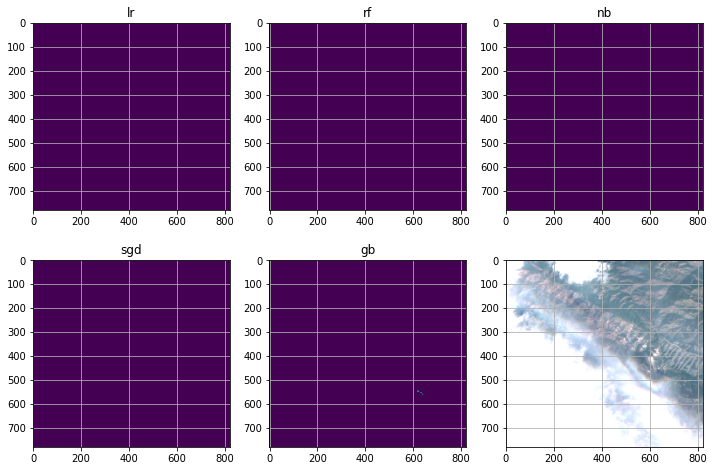

In [21]:
visual_check(y_grassmtn_neg_preds, grassmtn_neg)

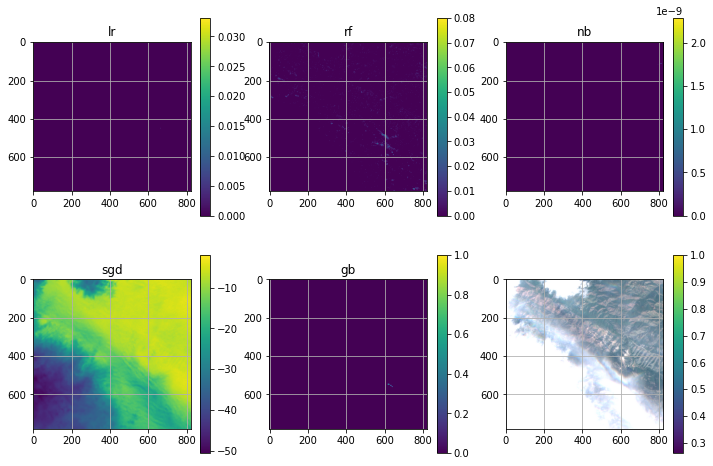

In [103]:
visual_check_proba(y_grassmtn_neg_pred_probas, grassmtn_neg)